## For `makemore_part1_bigrams.ipynb`
I tried to use my own turkish data but I come across some weird results simply because of turkish character set. `chs_set.add(ch)` operation below result all regular characters and an additional '' character unlike the behavior in the lecture. It turns out in the `turkce_isim.csv` contains some unicode characters (`Combining Dot Above`) and naturally it apperared in the character set.

In [1]:
import unicodedata

with open('turkce_isim.csv', 'r' ) as f:
    data = f.read().splitlines()  
names = [i.split(',')[0]for i in data[1:]]
chs_set = set()

for name in names:
    for ch in list(name):
        chs_set.add(ch)       
print(sorted(list(chs_set)),len(sorted(list(chs_set))))   

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'ç', 'ö', 'ü', 'ğ', 'ı', 'ş'] 31


In [2]:
turkish_sort = ['a', 'b', 'c', 'ç', 'd', 'e', 'f', 'g', 'ğ', 'h', 'ı', 'i', 'j', 'k', 'l', 'm', 'n', 'o','ö', 'p', 'r', 's', 'ş', 't', 'u','ü', 'v', 'w', 'x', 'y', 'z']
turkish_sort.insert(0,'.')
turkish_sort,len(turkish_sort)

(['.',
  'a',
  'b',
  'c',
  'ç',
  'd',
  'e',
  'f',
  'g',
  'ğ',
  'h',
  'ı',
  'i',
  'j',
  'k',
  'l',
  'm',
  'n',
  'o',
  'ö',
  'p',
  'r',
  's',
  'ş',
  't',
  'u',
  'ü',
  'v',
  'w',
  'x',
  'y',
  'z'],
 32)

In [3]:
stoi = {ch:i for i,ch in enumerate(turkish_sort)}
stoi

{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'ç': 4,
 'd': 5,
 'e': 6,
 'f': 7,
 'g': 8,
 'ğ': 9,
 'h': 10,
 'ı': 11,
 'i': 12,
 'j': 13,
 'k': 14,
 'l': 15,
 'm': 16,
 'n': 17,
 'o': 18,
 'ö': 19,
 'p': 20,
 'r': 21,
 's': 22,
 'ş': 23,
 't': 24,
 'u': 25,
 'ü': 26,
 'v': 27,
 'w': 28,
 'x': 29,
 'y': 30,
 'z': 31}

In [4]:
itos = {i: st for st, i in stoi.items()}
itos

{0: '.',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'ç',
 5: 'd',
 6: 'e',
 7: 'f',
 8: 'g',
 9: 'ğ',
 10: 'h',
 11: 'ı',
 12: 'i',
 13: 'j',
 14: 'k',
 15: 'l',
 16: 'm',
 17: 'n',
 18: 'o',
 19: 'ö',
 20: 'p',
 21: 'r',
 22: 's',
 23: 'ş',
 24: 't',
 25: 'u',
 26: 'ü',
 27: 'v',
 28: 'w',
 29: 'x',
 30: 'y',
 31: 'z'}

In [5]:
import torch
N = torch.zeros((32, 32), dtype=torch.int32)

for chs in names:
    chs = '.'+ chs +'.'
    for i in zip(chs,chs[1:]):
        ix=stoi[i[0]]
        iy=stoi[i[1]]
        N[ix,iy] += 1

In [6]:
torch.log(N+1)

tensor([[0.0000, 7.3690, 6.8459,  ..., 0.0000, 6.0568, 5.6525],
        [6.9048, 3.4965, 5.8141,  ..., 0.0000, 7.1678, 5.8999],
        [3.1781, 6.5191, 2.7726,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.6931, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [6.5779, 6.3226, 4.0431,  ..., 0.0000, 4.0431, 3.1355],
        [6.0234, 5.7991, 3.8501,  ..., 0.0000, 2.1972, 3.1355]])

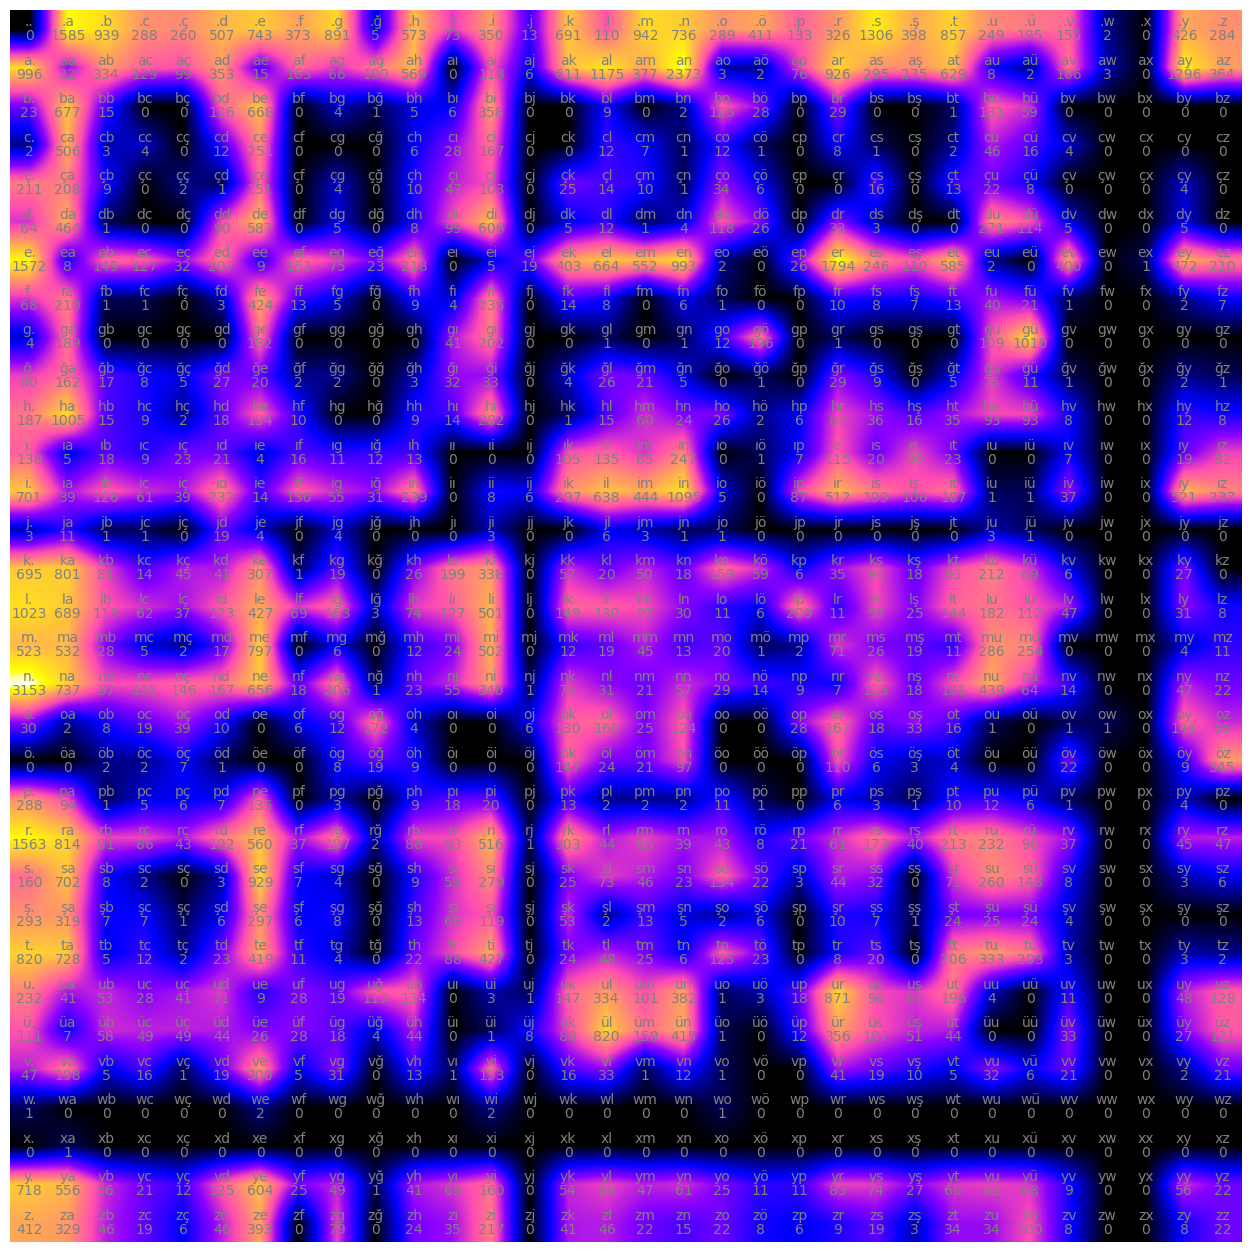

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(torch.log(N+1), cmap='gnuplot2', interpolation='bilinear')
for i in range(32):
    for j in range(32):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

Read the torch multinominial distribution first then 
read torch.sum. to understand the dimension of the tensor.
then torch broadcasting semantics

### What is multinomial distribution:
**While I was trying to understand the multinomial distribution, I realized that there is no need to normalize the distribution. The multinomial distribution is already normalized. If the sum of the probabilities is not 1, then torch.multinomial use floats as weights and the result will be the same.WOW!**

In [8]:
P= N[0].float()
P

tensor([   0., 1585.,  939.,  288.,  260.,  507.,  743.,  373.,  891.,    5.,
         573.,   73.,  350.,   13.,  691.,  110.,  942.,  736.,  289.,  411.,
         133.,  326., 1306.,  398.,  857.,  249.,  195.,  155.,    2.,    0.,
         426.,  284.])

In [9]:
# beware it only works for the first row. if yo want to normalize the whole matrix, you need to to use the dim=1 parameter and need to keepdims=True
Normalized =  P/P.sum()
Normalized

tensor([0.0000, 0.1123, 0.0665, 0.0204, 0.0184, 0.0359, 0.0527, 0.0264, 0.0631,
        0.0004, 0.0406, 0.0052, 0.0248, 0.0009, 0.0490, 0.0078, 0.0668, 0.0522,
        0.0205, 0.0291, 0.0094, 0.0231, 0.0926, 0.0282, 0.0607, 0.0176, 0.0138,
        0.0110, 0.0001, 0.0000, 0.0302, 0.0201])

In [10]:
g = torch.Generator().manual_seed(2147483647)
torch.multinomial(Normalized,10,generator=g)

tensor([10, 22,  1,  2, 12, 21, 16,  3,  4,  8])

In [11]:
g = torch.Generator().manual_seed(2147483647)
torch.multinomial(P,10,generator=g)

tensor([10, 22,  1,  2, 12, 21, 16,  3,  4,  8])

### What is torch.sum:
- What are the dimensions?
- What happens if we use more than one dimension(reduce)?
- [torch.sum link:](https://pytorch.org/docs/stable/generated/torch.sum.html)

In [12]:
b = torch.arange(4 * 5 * 6).view(4, 5, 6)


In [13]:
b

tensor([[[  0,   1,   2,   3,   4,   5],
         [  6,   7,   8,   9,  10,  11],
         [ 12,  13,  14,  15,  16,  17],
         [ 18,  19,  20,  21,  22,  23],
         [ 24,  25,  26,  27,  28,  29]],

        [[ 30,  31,  32,  33,  34,  35],
         [ 36,  37,  38,  39,  40,  41],
         [ 42,  43,  44,  45,  46,  47],
         [ 48,  49,  50,  51,  52,  53],
         [ 54,  55,  56,  57,  58,  59]],

        [[ 60,  61,  62,  63,  64,  65],
         [ 66,  67,  68,  69,  70,  71],
         [ 72,  73,  74,  75,  76,  77],
         [ 78,  79,  80,  81,  82,  83],
         [ 84,  85,  86,  87,  88,  89]],

        [[ 90,  91,  92,  93,  94,  95],
         [ 96,  97,  98,  99, 100, 101],
         [102, 103, 104, 105, 106, 107],
         [108, 109, 110, 111, 112, 113],
         [114, 115, 116, 117, 118, 119]]])

In [16]:
#got it
#the result is (1, 5, 6) tensor. it is the sum of the 1st(dim=0) dimension of the input tensor
b = torch.arange(4 * 5 * 6).view(4, 5, 6)
torch.sum(b,0,keepdim=True)




tensor([[[180, 184, 188, 192, 196, 200],
         [204, 208, 212, 216, 220, 224],
         [228, 232, 236, 240, 244, 248],
         [252, 256, 260, 264, 268, 272],
         [276, 280, 284, 288, 292, 296]]])

In [14]:
#got it
#the result is (4, 1, 6) tensor. Because we sum the second(dim=1) dimension.
torch.sum(b,1,keepdim=True)

tensor([[[ 60,  65,  70,  75,  80,  85]],

        [[210, 215, 220, 225, 230, 235]],

        [[360, 365, 370, 375, 380, 385]],

        [[510, 515, 520, 525, 530, 535]]])

In [15]:
#got it
#the result is (4, 5, 1) tensor. Because we sum the third(dim=2) dimension. 
torch.sum(b,2,keepdim=True)

tensor([[[ 15],
         [ 51],
         [ 87],
         [123],
         [159]],

        [[195],
         [231],
         [267],
         [303],
         [339]],

        [[375],
         [411],
         [447],
         [483],
         [519]],

        [[555],
         [591],
         [627],
         [663],
         [699]]])

In [20]:
P = N / N.sum(1,keepdim=True)
P[0]

tensor([0.0000, 0.1123, 0.0665, 0.0204, 0.0184, 0.0359, 0.0527, 0.0264, 0.0631,
        0.0004, 0.0406, 0.0052, 0.0248, 0.0009, 0.0490, 0.0078, 0.0668, 0.0522,
        0.0205, 0.0291, 0.0094, 0.0231, 0.0926, 0.0282, 0.0607, 0.0176, 0.0138,
        0.0110, 0.0001, 0.0000, 0.0302, 0.0201])

In [25]:
#first sample from the N as you start with the first character(.) which is 0 

for i in range(10):
    ix = 0
    while True:
        p = torch.multinomial(P[ix],1)
        ix = p.item()
        print(itos[p.item()])
        if ix == 0:
            break
        
    
    

t
a
n
c
e
r
a
t
e
r
e
r
z
ü
n
e
s
l
g
ü
l
.
h
a
v
h
a
n
a
n
.
m
ü
.
s
i
n
e
t
a
y
e
n
u
l
a
l
u
l
t
ı
b
d
a
l
l
a
h
a
z
g
u
r
a
t
a
e
r
a
t
u
z
ı
s
ü
l
.
s
m
.
o
ğ
u
n
u
l
d
a
y
t
.
m
i
r
a
t
.
h
a
k
.
t
.
b
i
r
e
k
e
m
i
r
k
i
.


In [ ]:
ii